# <font color='Green'>  Notebook du projet DEEP LEARNING: </font>


<font color='Green'>  ***ÉCOLE : </font> IA SCHOOL***

<font color='Green'>***BRANCHE : </font> DATA SCIENTIST***

<font color='Green'>***GUIDE : </font> Mr. PEDRO***

<font color='Green'>***ANNEE : </font> 2020 - 2021***

<font color='Green'>***ÉTUDIANTS : </font> 
BEN YASSINE Mohamed, SBAI Aymen, DIALLO Mohamed Kindi, SIDIBE Sidiki Aboubacar, DIALLO Amadou lamarana***

### <font color='green'> Themes</font>

In [1]:
!pip install jupyterthemes

In [2]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

In [3]:
#set_nb_theme('grade3')

# <font color='Green'>  ***Données de Détection d'aveuglement***</font>


 <font color='Green'>  ***Problématique :***</font>


La rétinopathie diabétique est une complication du diabète qui affecte les yeux. 
L'endommagement des vaisseaux sanguins du tissu sensible à la lumière de la rétine provoque cette complication. 
La rétinopathie diabétique (RD) est l'une des principales causes de perte de vision dans le monde. 
Environ un tiers des 285 millions de personnes atteintes de diabète sucré dans le monde présentent des signes de RD.


Aujourd'hui, dans ce notebook, nous allons essayer de résoudre le problèm d'aveuglement et on va développer un Modèle de classification d'images,

Nous allons d'abord Explorer les données, nous utiliserons la base ***APTOS 2019 Blindness Detection*** 

C'est Modèle de classification d'images pour la détection et la classification de la RETINOPATHIE DIABÉTIQUE à partir d'images de la rétine.  
Des millions de personnes souffrent de rétinopathie diabétique, la principale cause de cécité chez les adultes en âge de travailler.

On espère détecter et prévenir cette maladie chez les personnes vivant dans des zones rurales où le dépistage médical est difficile à réaliser. 
 
Construire un modèle d'apprentissage profond pour accélérer la détection de la maladie et la classification de sa catégorie. 
Travaillé avec des milliers d'images collectées dans les zones rurales pour aider à identifier automatiquement la rétinopathie diabétique. 
 
Ces modèles pourraient être utilisés pour détecter d'autres types de maladies à l'avenir, comme le glaucome et la dégénérescence maculaire. 
 

<font color='Green'>  ***Objectifs :***</font>



L'objectif principal de ce projet est de développer un Modèle qui sera capable d'identifier les patients
patients atteints de rétinopathie diabétique à partir d'une image couleur ou d'une image en niveaux de gris obtenue à partir de la rétine du patient.
Ces types d'images sont appelés images du fond de l'œil. Les différentes anomalies de la rétinopathie diabétique
rétinopathie diabétique qui présentent un intérêt sont les micro-anévrismes, les hémorragies et les exsudats. exsudats. 

La détection de ces anomalies permet de déterminer si la personne est infectée ou normale.

L'objectif secondaire comprend le développement d'un outil d'interface graphique utilisateur qui sera utilisé par l'ophtalmologiste pour marquer les images du fond de l'œil. 

Les images marquées doivent être
Les images marquées seront utilisées pour le développement d'un système de classification et de base de données de la RD pour ce travail actuel et futur.

<font color='Green'>  ***Description de la bdd:*** </font>


APTOS a fourni un ensemble d'images de fonds de grandes images dans une variété de conditions d'imagerie.
Les données étaient diverses et volumineuses.

Les données comprennent 3 662 images de rétine étiquetées de patients cliniques et un ensemble de test avec 1 928 images avec des étiquettes inconnues. 

Un clinicien a évalué chaque image pour la gravité de la rétinopathie diabétique sur une échelle de zéro où les nombres représentent l'étendue de la complication :

-- La distribution de combien d'images par classe :

-- 0 = Pas de RD (rétinopathie diabétique )

-- 1 = Doux

-- 2 = Modéré

-- 3 = Sévère

-- 4 = RD proliférative

***Chargeons les modules nécessaires :***

In [4]:
!pip install tensorflow

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install datapackage

     |████████████████████████████████| 85 kB 672 kB/s  eta 0:00:01
     |████████████████████████████████| 68 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 72 kB 89 kB/s s eta 0:00:01
     |████████████████████████████████| 124 kB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 243 kB 67.7 MB/s eta 0:00:01
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10768 sha256=984bac9d9d120fd2c51500172b8f7947c0f445630b54a916911a91f8e2a3f8cf
  Stored in directory: /home/azureuser/.cache/pip/wheels/8d/0b/ff/bbba4ab3cf81844c3f8d130f8c53d392e1224b9750a71f0485
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7381 sha256=5d231f6325ef7f0f4502c8cc0eb016615d2f94b0abe4a178cc2ab0d72ff15f7f
  Stored in directory: /home/azureuser/.cache/pip/wheels/5d/7e/c9/9c5fbe678cf8d5892ae6a0b56d514d50882a9603362d90da29
Successfully built unicodecsv linear-tsv

In [10]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install missingno

     |████████████████████████████████| 285 kB 7.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:

import pandas as pd
import csv
import datapackage
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Images
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2

from tqdm import tqdm_notebook as tqdm

import random
import time
import sys
import os
import math
import re
import cv2


# Deep learning librairies

import tensorflow as tf
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


On a téléchargé les données de Kaggle et écrit un script pour télécharger les données dans un ensemble de données précédemment créé appelé ***Blindness Detection Dataset***

# <font color='Green'> Exploration des données
</font>

L'ensemble de données peut être téléchargé sur le [Site web du concours](https://www.kaggle.com/c/aptos2019-blindness-detection/data). 

***Commençons par importer les données et examinons la distribution des classes :***

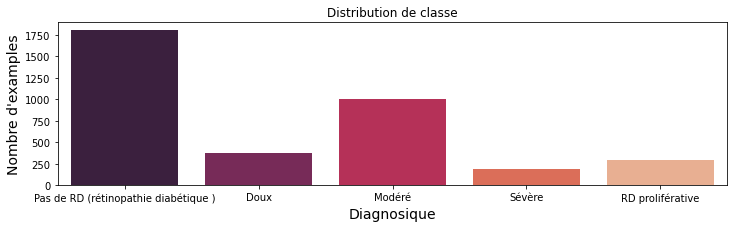

In [13]:
# importation de données
train = pd.read_csv('train.csv')
test  = pd.read_csv('sample_submission.csv')

# plot

counts = train['diagnosis'].value_counts()
class_list = ['Pas de RD (rétinopathie diabétique )', 'Doux', 'Modéré', 'Sévère', 'RD proliférative']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)
plt.figure(figsize=(12,3))
sns.barplot(counts.index, counts.values, alpha=1, palette='rocket')
plt.title('Distribution de classe')
plt.ylabel("""Nombre d'examples""", fontsize=14)
plt.xlabel('Diagnosique', fontsize=14)
plt.show()

Résumé du graphique :
- Comme nous pouvons le constater, il existe un déséquilibre des classes dans la distribution des classes de sortie. 

Nous en tiendrons compte lors de la formation des modèles en utilisant des méthodes d'augmentation des données et d'équilibrage des classes.

Cette fonction permet de lire les données des répertoires respectifs de train et de test.

In [14]:
def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    
    train_dir = os.path.join('./','train_images/')
    test_dir = os.path.join('./','test_images/')
    
    train['file_path'] = train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
    test['file_path'] = test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))
    
    train['file_name'] = train["id_code"].apply(lambda x: x + ".png")
    test['file_name'] = test["id_code"].apply(lambda x: x + ".png")
    
    train['diagnosis'] = train['diagnosis'].astype(str)
    
    return train,test

In [15]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train.head(6)

(3662, 4) (1928, 3) 



id_code diagnosis                        file_path         file_name
0  000c1434d8d7         2  ./train_images/000c1434d8d7.png  000c1434d8d7.png
1  001639a390f0         4  ./train_images/001639a390f0.png  001639a390f0.png
2  0024cdab0c1e         1  ./train_images/0024cdab0c1e.png  0024cdab0c1e.png
3  002c21358ce6         0  ./train_images/002c21358ce6.png  002c21358ce6.png
4  005b95c28852         0  ./train_images/005b95c28852.png  005b95c28852.png
5  0083ee8054ee         4  ./train_images/0083ee8054ee.png  0083ee8054ee.png

In [16]:
train['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

Définition d'une variable globale à utiliser comme taille d'image

In [17]:
IMG_SIZE = 100

Cette fonction convertit une image en couleur en une image en échelle de gris.

In [18]:
def conv_gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    return img

Cette fonction montre la photo de l'image visuelle de 'n x 5' points (5 de chaque classe).

In [19]:
def visualize_imgs(df,pts_per_class,color_scale):
    df = df.groupby('diagnosis',group_keys = False).apply(lambda df: df.sample(pts_per_class))
    df = df.reset_index(drop = True)
    
    plt.rcParams["axes.grid"] = False
    for pt in range(pts_per_class):
        f, axarr = plt.subplots(1,5,figsize = (15,15))
        axarr[0].set_ylabel("Exemples de points de données")
        
        df_temp = df[df.index.isin([pt + (pts_per_class*0),pt + (pts_per_class*1), pt + (pts_per_class*2),pt + (pts_per_class*3),pt + (pts_per_class*4)])]
        for i in range(5):
            if color_scale == 'gray':
                img = conv_gray(cv2.imread(df_temp.file_path.iloc[i]))
                axarr[i].imshow(img,cmap = color_scale)
            else:
                axarr[i].imshow(Image.open(df_temp.file_path.iloc[i]).resize((IMG_SIZE,IMG_SIZE)))
            axarr[i].set_xlabel('Class '+str(df_temp.diagnosis.iloc[i]))

        plt.show()

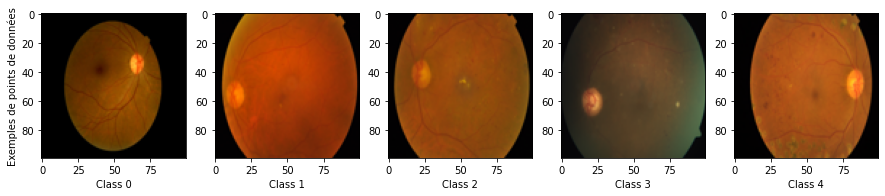

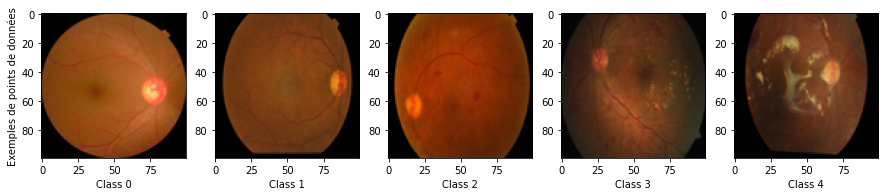

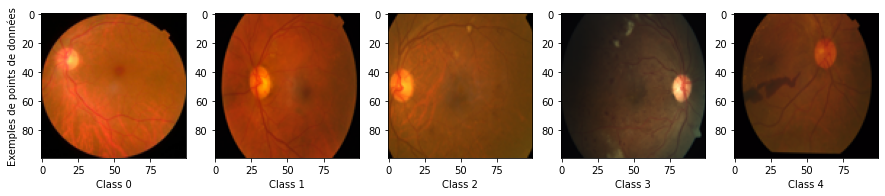

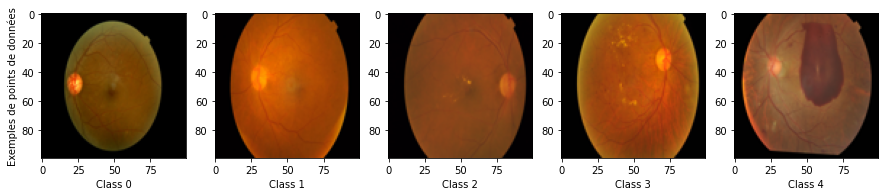

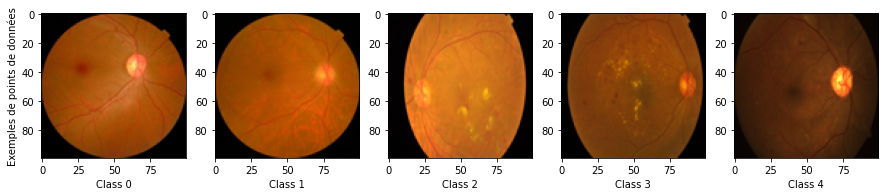

In [20]:
visualize_imgs(df_train,5,color_scale = None)

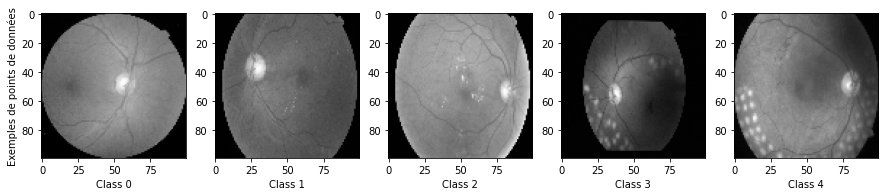

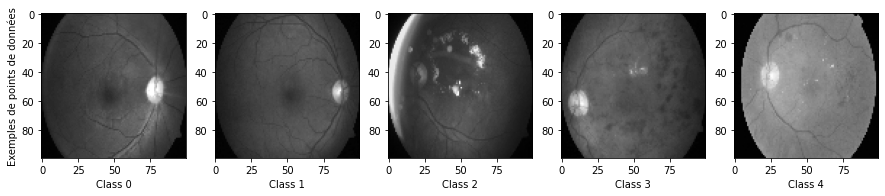

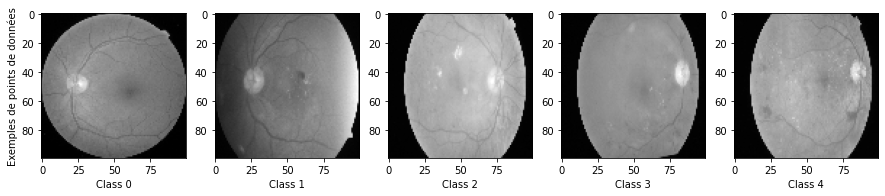

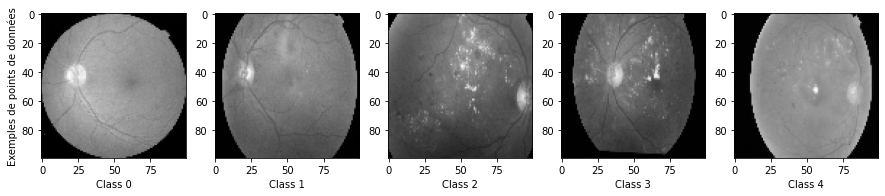

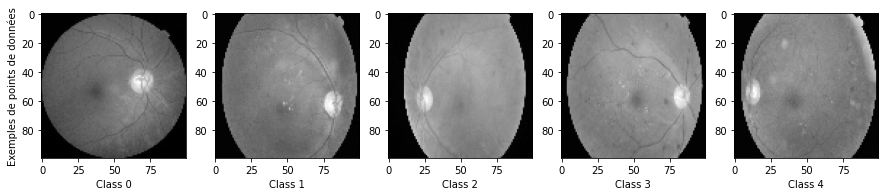

In [21]:
visualize_imgs(df_train,5,color_scale = 'gray')

<font color='Green'> ***Explication***
</font>


- Comme nous pouvons le constater, en allant vers les classes supérieures, nous sommes capables de comprendre un plus grand nombre d'anomalies dans les images de l'œil. 

De plus, les conditions d'éclairement et de luminosité ne sont pas uniformes sur toutes les images. Nous allons essayer de gérer cela en utilisant des techniques de traitement d'image. 

En outre, les images en échelle de gris donnent une meilleure visualisation des caractéristiques de l'œil par rapport aux images RVB.



***Avant tout  quoi se réfère l'état de rétinopathie diabétique de l'œil ?***

***Comment savoir si un patient a une rétinopahie diabétique ?***

In [22]:
from IPython.display import Image

<img src="image.jpeg">

Voici les 5 choses à repérer

## <font color='Green'> ***Traitement des images :***
</font>

Malgré la conversion en échelle de gris, je pense que dans les 5 exemples ici sont difficiles à repérer. 

On essayant d'appliquer la méthode [Gaussian_blur](https://en.wikipedia.org/wiki/Gaussian_blur) pour reperer mieux les details.

***Inspirée par :*** 


***Référence: https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy#3.-Further-improve-by-auto-cropping***

L'appliquation de flou gaussien sur l'image.


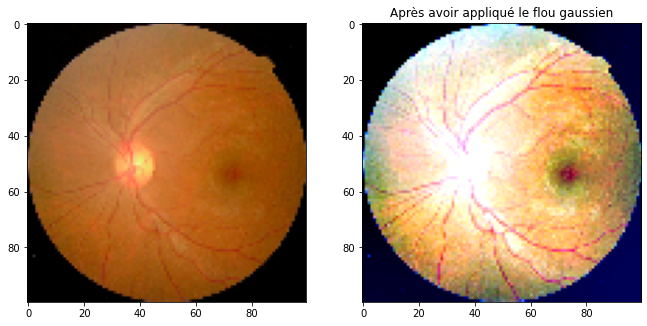

In [24]:
rn = np.random.randint(low = 0,high = len(df_train) - 1)

img = cv2.imread(df_train.file_path.iloc[rn])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('Après avoir appliqué le flou gaussien')
plt.show()

Comme nous pouvons le voir, après avoir appliqué le flou gaussien, nous sommes en mesure de faire ressortir les caractéristiques/détails de l'image beaucoup plus clairement dans l'œil.

Cette fonction effectue un traitement d'image sur les images en effectuant un flou gaussien et un recadrage.


In [25]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

 Créer un recadrage circulaire autour du centre de l'image    
    

In [26]:
def circle_crop(img, sigmaX):   
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

Effectuer un traitement d'image sur un échantillon d'image

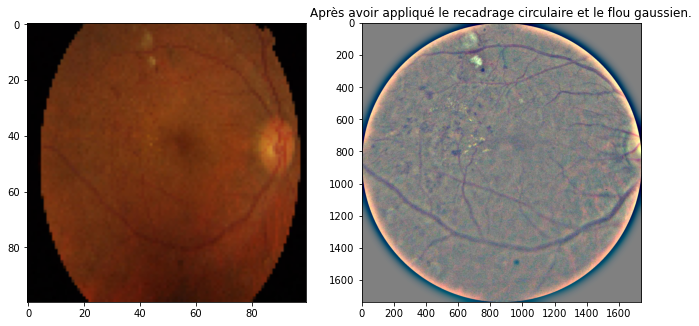

In [27]:
rn = np.random.randint(low = 0,high = len(df_train) - 1)

#img = img_t
img = cv2.imread(df_train.file_path.iloc[rn])
img_t = circle_crop(img,sigmaX = 30)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),(IMG_SIZE,IMG_SIZE)))
axarr[1].imshow(img_t)
plt.title('Après avoir appliqué le recadrage circulaire et le flou gaussien.')
plt.show()

Cette fonction montre la photo de l'image visuelle de 'n x 5' points (5 de chaque classe). 
et effectue une transformation de l'image (flou gaussien, rognage circulaire) par-dessus.

In [28]:
def visualize_img_process(df,pts_per_class,sigmaX):
    df = df.groupby('diagnosis',group_keys = False).apply(lambda df: df.sample(pts_per_class))
    df = df.reset_index(drop = True)
    
    plt.rcParams["axes.grid"] = False
    for pt in range(pts_per_class):
        f, axarr = plt.subplots(1,5,figsize = (15,15))
        axarr[0].set_ylabel("Sample Data Points")
        
        df_temp = df[df.index.isin([pt + (pts_per_class*0),pt + (pts_per_class*1), pt + (pts_per_class*2),pt + (pts_per_class*3),pt + (pts_per_class*4)])]
        for i in range(5):
            img = cv2.imread(df_temp.file_path.iloc[i])
            img = circle_crop(img,sigmaX)
            axarr[i].imshow(img)
            axarr[i].set_xlabel('Class '+str(df_temp.diagnosis.iloc[i]))

        plt.show()

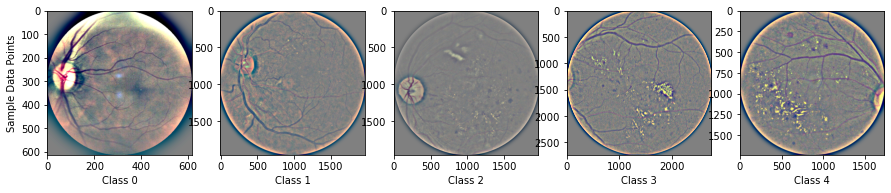

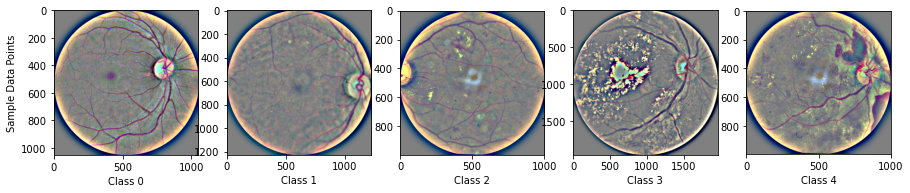

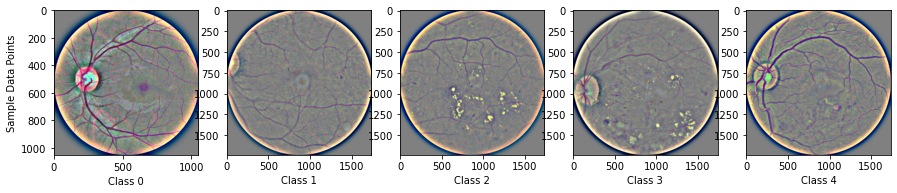

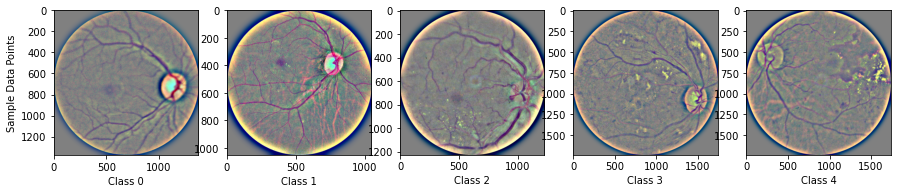

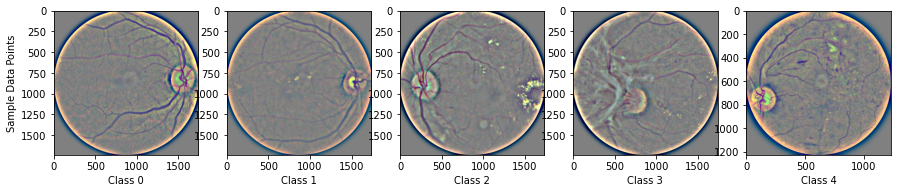

In [29]:
visualize_img_process(df_train,5,sigmaX = 30)

Nous comprenons clairement l'importance d'effectuer des opérations de traitement d'image ici. 
Nous avons effectué un flou gaussien pour faire ressortir les détails et les caractéristiques de l'image de manière beaucoup plus claire et explicite.
Cette fonction montre la photo de l'image visuelle de 'n x 5' points (5 de chaque classe). 


## <font color='Green'> ***Augmentation des données***
</font>

In [30]:
from keras.preprocessing.image import ImageDataGenerator

Cette fonction génère un nombre 'lim' d'augmentations d'images à partir d'une image aléatoire du répertoire


In [31]:
def generate_augmentations(lim):
    datagen = ImageDataGenerator(featurewise_center=True,
                                 featurewise_std_normalization=True,
                                 rotation_range=20,
                                 #width_shift_range=0.2,
                                 #height_shift_range=0.2,
                                 horizontal_flip=True)
    img = cv2.imread(df_train.file_path.iloc[np.random.randint(low = 0,high = len(df_train) - 1)])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.title('Images originales')
    plt.show()
    
    img_arr = img.reshape((1,) + img.shape)
    
    i = 0
    for img_iterator in datagen.flow(x = img_arr,batch_size = 1):
        i = i + 1
        if i > lim:
            break
        plt.imshow((img_iterator.reshape(img_arr[0].shape)).astype(np.uint8))
        plt.title('Image augementer ' + str(i))
        plt.show() 

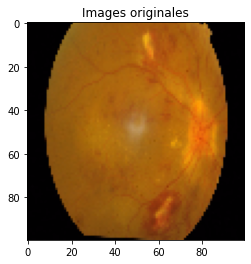

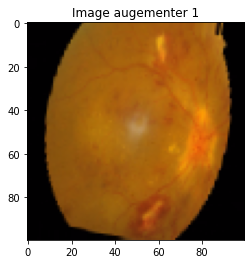

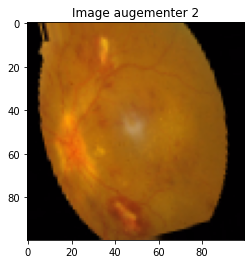

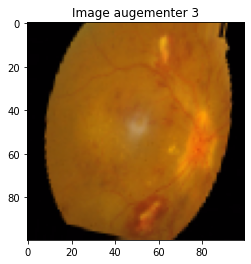

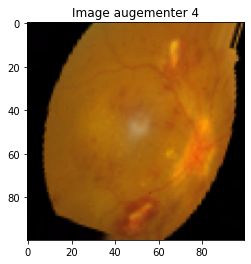

In [32]:
generate_augmentations(4)

Comme nous pouvons le voir ci-dessus, les augmentations d'images sont extrêmement utiles pour ces ensembles de données afin de rendre nos modèles plus robustes et d'avoir une meilleure capacité de généralisation.

In [33]:
pip install streamlit

     |████████████████████████████████| 8.2 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 727 kB 72.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 425 kB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 72.6 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.1 MB/s  eta 0:00:01
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13452 sha256=a2f5f55f8d9737926ebf3efeda579ba13df1efcdee83eb173693ce13c705a31c
  Stored in directory: /home/azureuser/.cache/pip/wheels/4f/4a/93/c5ed8c11fedbe97fb8b8032b301eaa736248684b44087a7259
Successfully built blinker
Note: you may need to restart the kernel to use updated packages.


## <font color='Green'> ***Modèles de réseaux neuronaux pour la classification multi-labels***
</font>

#### <font color='Green'> ***Installation***
</font>

In [34]:
img_dir = "train_images/"

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 8
IMAGE_SIZE = [320, 320]
SEED = 42

#### <font color='Green'> ***Chargement des données***
</font>


In [35]:
df = pd.read_csv("train.csv")
df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

Diviser le jeu de données en jeu de train, val et test

In [36]:
train_df, val_df = train_test_split(df, stratify=df['diagnosis'], test_size=0.2, random_state=SEED)

construire un jeu de données avec des chemins d'images et des étiquettes
pour le train :

In [37]:
imagePaths = train_df.apply(lambda x : img_dir + str(x[0]) + ".png", axis=1).values

labels = train_df.iloc[:, -1].values

train_ds = tf.data.Dataset.from_tensor_slices((imagePaths, labels))

Ensemble de validation

In [38]:
imagePaths = val_df.apply(lambda x : img_dir + str(x[0]) + ".png", axis=1).values

labels = val_df.iloc[:, -1].values

val_ds = tf.data.Dataset.from_tensor_slices((imagePaths, labels))

Liste des chemins d'images de l'ensemble de données d'entraînement

In [39]:
for f in train_ds.take(5):
    print(f[0].numpy())

b'train_images/b2b79b37d314.png'
b'train_images/175dd560810a.png'
b'train_images/c3cd0200df79.png'
b'train_images/cfed7c1172ec.png'
b'train_images/e811f39a1243.png'


In [40]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_ds).numpy()
print("Count des images train : ", str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_ds).numpy()
print("Count des images validation : ", str(VAL_IMG_COUNT))

Count des images train :  2929
Count des images validation :  733


Lire une image depuis un fichier, la décoder en un tensor dense, et la redimensionner à une forme fixe.


In [41]:
def get_label(label):
    return tf.one_hot(label, 5)

def decode_img(image):
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return tf.image.resize(image, IMAGE_SIZE)

def preprocess(image, label):
    image = tf.io.read_file(image)
    image = decode_img(image)
    label = get_label(label)
    return image, label

In [42]:
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)

val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE)

In [43]:
for image, label in train_ds.take(1):
    print("Forme de l'image : ", image.numpy().shape)
    print("Étiquette: ", label.numpy())

Forme de l'image :  (320, 320, 3)
Étiquette:  [1. 0. 0. 0. 0.]


In [44]:
def augment(image):
    
    image = tf.image.random_contrast(image, 0.75, 1.25)
    image = tf.image.random_saturation(image, 0.75, 1.25)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, k=2)

    return image

In [45]:
def prepare_for_training(ds, augmentation=False):
    
    if augmentation:
        ds = ds.map(lambda x, y: (augment(x), y), num_parallel_calls=AUTOTUNE)

    ds = ds.batch(batch_size=BATCH_SIZE)
    
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [46]:
train_ds = prepare_for_training(train_ds, augmentation=True)
val_ds = prepare_for_training(val_ds)


#### <font color='Green'> ***Visualiser l'ensemble des données***
</font>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


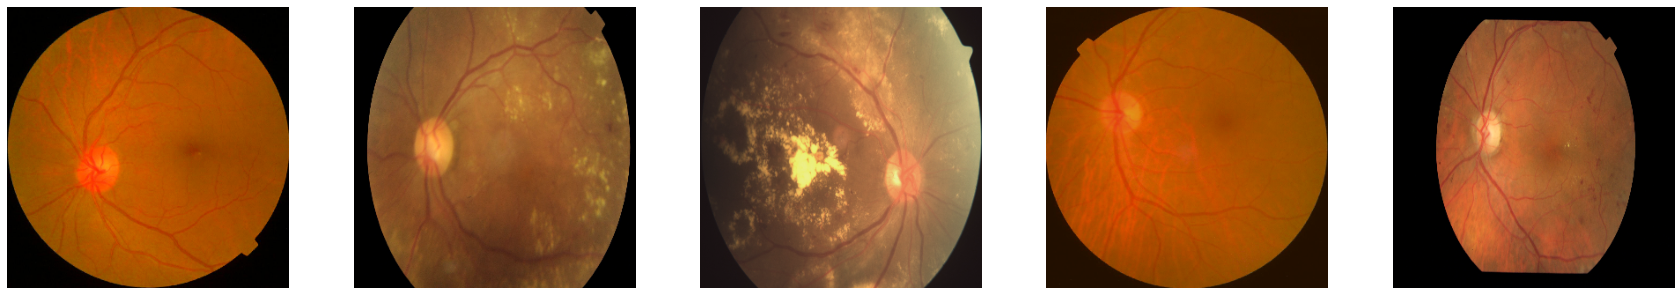

In [47]:
image_batch, label_batch = next(iter(train_ds))

def show_batch(image_batch):
    plt.figure(figsize=(30, 30))
    for n in range(5):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        plt.axis("off")
        
show_batch(image_batch.numpy())

## <font color='Green'> ***Convolutional neural network  CNN***
</font>

In [48]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model-dr.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

lr_plateau_cb = tf.keras.callbacks.ReduceLROnPlateau(patience=3)

In [49]:
callbacks = [checkpoint_cb, early_stopping_cb, lr_plateau_cb]

### <font color='Green'> Mesure pour faire face au déséquilibre des données</font>


In [50]:
no_dr, mild, moderate, severe, dr = np.bincount(df['diagnosis'])
total = no_dr + mild + moderate + severe + dr

weight_for_0 = (1 / no_dr) * (total) / 2.0 
weight_for_1 = (1 / mild) * (total) / 2.0
weight_for_2 = (1 / moderate) * (total) / 2.0 
weight_for_3 = (1 / severe) * (total) / 2.0
weight_for_4 = (1 / dr) * (total) / 2.0

class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))
print('Weight for class 4: {:.2f}'.format(weight_for_4))

Weight for class 0: 1.01
Weight for class 1: 4.95
Weight for class 2: 1.83
Weight for class 3: 9.49
Weight for class 4: 6.21


### <font color='Green'> Entraîner le modèle</font>

In [51]:
def build_model():

    model = tf.keras.Sequential([
        DenseNet121(input_shape=(320, 320, 3), weights="imagenet", include_top=False),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2048, activation="elu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(5, activation="softmax")
    ])
     
    return model

In [52]:
model = build_model()

model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=1e-4),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
    )

29089792/29084464 [==============================] - 0s 0us/step


In [53]:
history = model.fit(train_ds,
                    epochs = 30,
                    validation_data = val_ds,
                    callbacks = callbacks,
                    class_weight = class_weights,
                    verbose = 1,
                    initial_epoch = 0)

Train for 367 steps, validate for 92 steps
Epoch 1/30
367/367 [==============================] - 254s 692ms/step - loss: 3.6888 - accuracy: 0.5347 - val_loss: 3.3083 - val_accuracy: 0.6357
Epoch 2/30
367/367 [==============================] - 209s 570ms/step - loss: 2.8647 - accuracy: 0.6378 - val_loss: 2.3458 - val_accuracy: 0.6958
Epoch 3/30
367/367 [==============================] - 204s 556ms/step - loss: 2.5101 - accuracy: 0.6869 - val_loss: 2.7035 - val_accuracy: 0.7244
Epoch 4/30
367/367 [==============================] - 204s 556ms/step - loss: 2.3735 - accuracy: 0.7166 - val_loss: 2.8875 - val_accuracy: 0.6780
Epoch 5/30
367/367 [==============================] - 204s 555ms/step - loss: 2.1736 - accuracy: 0.7388 - val_loss: 2.5891 - val_accuracy: 0.7476
Epoch 6/30
367/367 [===========

sauvergarde du modele 


In [54]:
model.save("model.h5")

### <font color='Green'> Visualisation de la performance du modèle</font>


In [56]:
def plot(hist):
    fig, ax = plt.subplots(1, 2, figsize = (30, 10))
    ax = ax.ravel()
    for i, metric in enumerate(['loss', 'accuracy']):
        ax[i].plot(hist.history[metric])
        ax[i].plot(hist.history['val_' + metric])
        ax[i].set_title('Model {}'.format(metric), fontsize=20)
        ax[i].set_xlabel('epochs', fontsize=16)
        ax[i].set_ylabel(metric, fontsize=16)
        ax[i].legend(['train', 'val'])

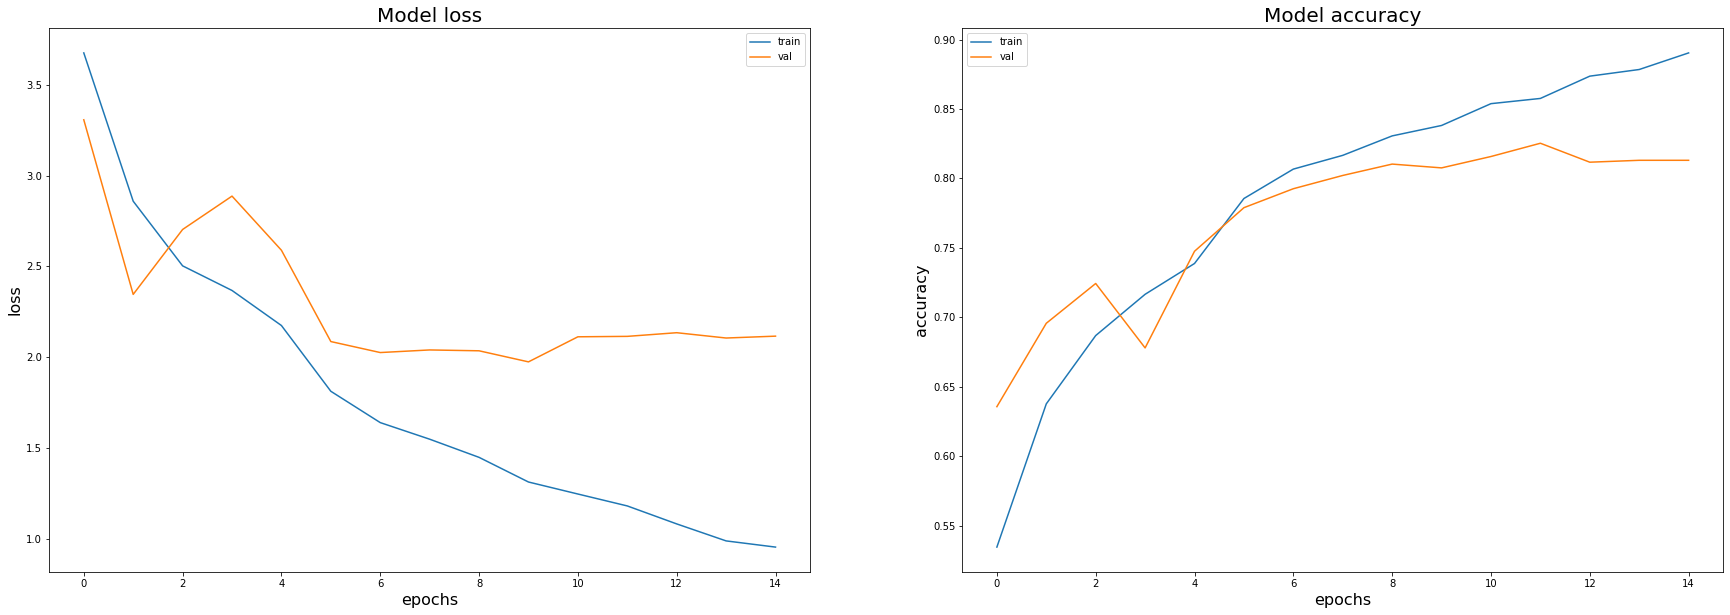

In [57]:
plot(history)

In [58]:
def plot_confusion_matrix(y, y_pred):
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

train set 

Le Kappa pondéré quadratique :  0.9408177769847557


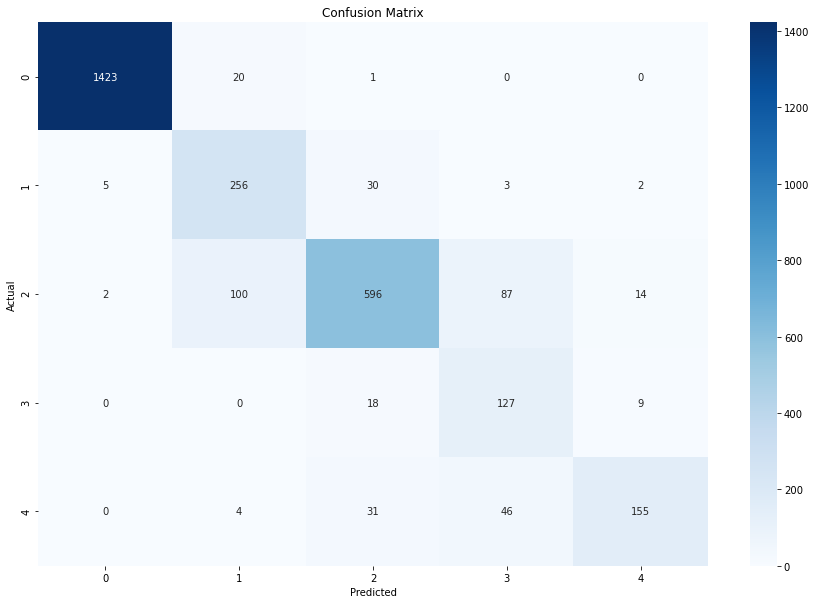

In [59]:
y = train_df["diagnosis"].values

y_pred = [np.argmax(pred) for pred in model.predict(train_ds)]

score = cohen_kappa_score(y, y_pred, weights='quadratic')
print('Le Kappa pondéré quadratique : ', score)

plot_confusion_matrix(y, y_pred)

### <font color='Green'> Prédire et évaluer les résultats</font>

In [60]:
model = tf.keras.models.load_model("model.h5")

In [61]:
loss, acc = model.evaluate(val_ds)

92/92 [==============================] - 33s 357ms/step - loss: 0.5375 - accuracy: 0.8076


Quadratic Weighted Kappa:  0.8772941647604698


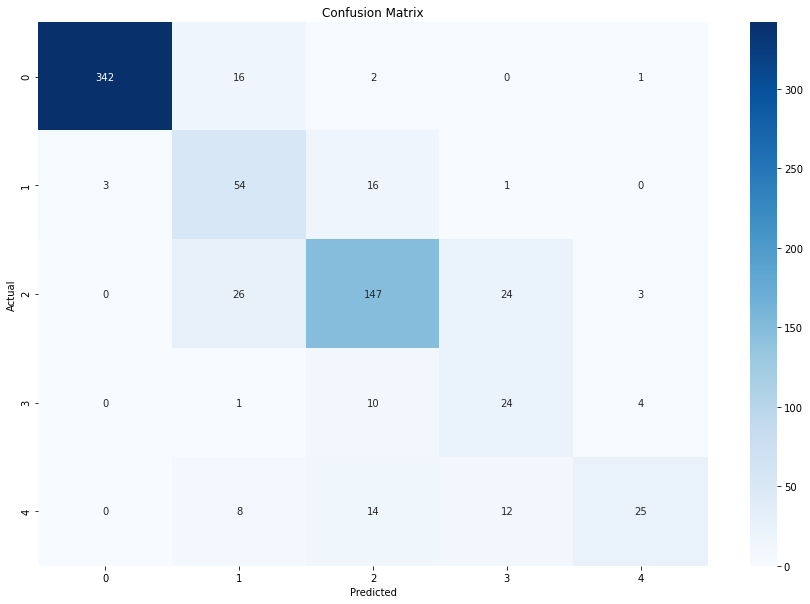

In [62]:
y = val_df["diagnosis"].values

y_pred = [np.argmax(pred) for pred in model.predict(val_ds)]

score = cohen_kappa_score(y, y_pred, weights='quadratic')
print('Quadratic Weighted Kappa: ', score)

plot_confusion_matrix(y, y_pred)

### <font color='Green'> Analyse des erreurs </font>

Ensemble de validation 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae0029ec50>]],
      dtype=object)

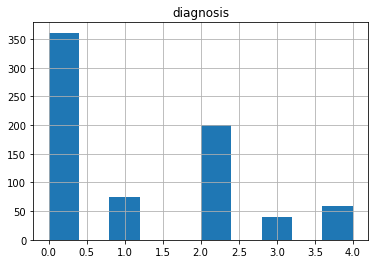

In [63]:
val_df.hist()

Il s'agit du nombre d'images et de leur grade de sévérité DR selon les différentes classes auxquelles elles appartiennent. Nous pouvons ensuite analyser l'étiquette prédite et l'étiquette réelle en utilisant la matrice de confusion.

Ces valeurs nous donnent les valeurs de sensibilité et de spécificité pour chaque classe et la précision globale

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       361
           1       0.51      0.73      0.60        74
           2       0.78      0.73      0.76       200
           3       0.39      0.62      0.48        39
           4       0.76      0.42      0.54        59

    accuracy                           0.81       733
   macro avg       0.69      0.69      0.67       733
weighted avg       0.83      0.81      0.81       733



- Comme nous pouvons le voir, le score F1 des classes 0 et 2 est élevé alors que celui des autres classes est faible. Notre modèle classifie mal ces classes et prédit correctement les classes 0 et 2.
- La classe 3 est fortement mal classée. La plupart des valeurs de la classe 3 sont prédites comme les classes 2 et 4.

### <font color='Green'> Visualiser les images avec les étiquettes réelles et prédites </font>

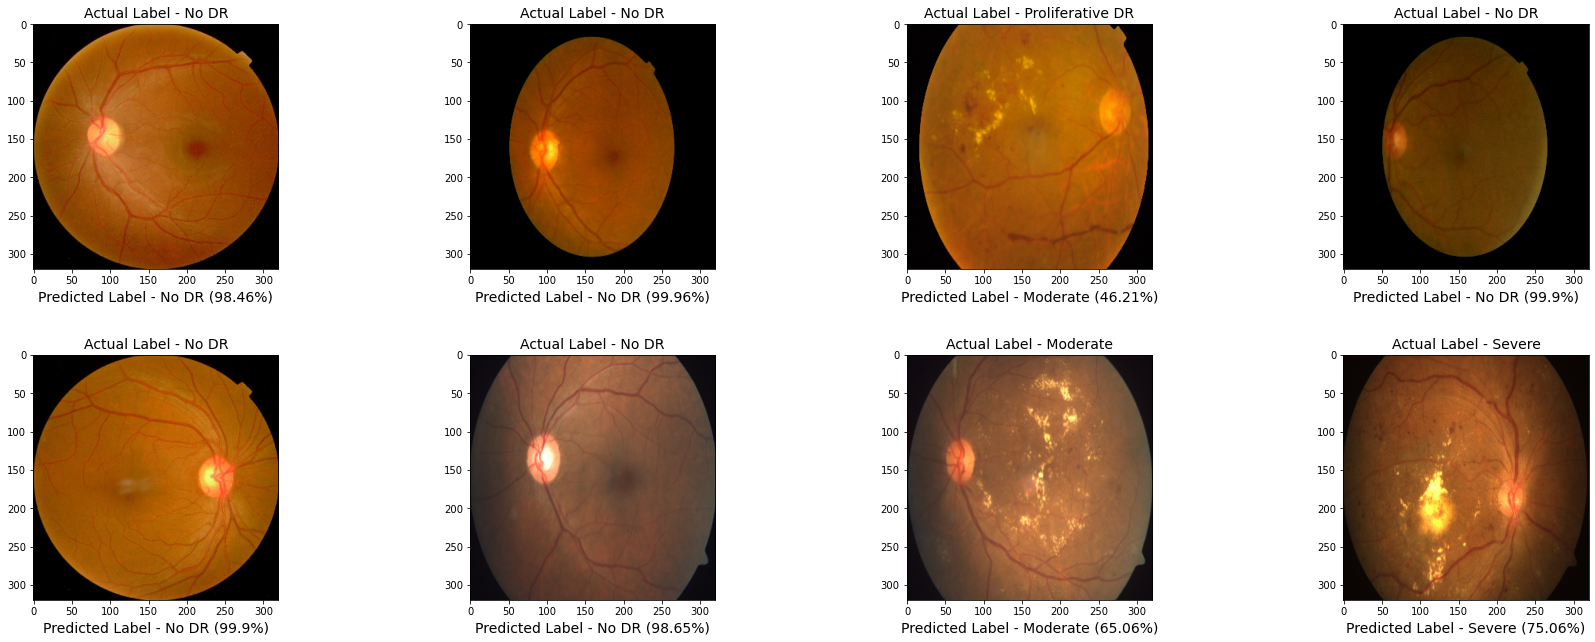

In [65]:
CLASS_NAMES = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

for image, label in val_ds.take(1):

    plt.figure(figsize=(30, 10))

    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(image[i])
        actual_label = "Actual Label - " + CLASS_NAMES[np.argmax(label[i].numpy())]
        plt.title(actual_label, fontsize=14)
        prediction = model.predict(val_ds.take(1))[i]
        number = str(round(100 * prediction[np.argmax(prediction)], 2))
        predicted_label = "Predicted Label - " + CLASS_NAMES[np.argmax(prediction)] + " (" + number + "%)"
        plt.xlabel(predicted_label, fontsize=14)

        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

Voici quelques images avec leur étiquette réelle et prédite avec le score de probabilité de la prédiction. Les patients qui n'ont pas de rétinopathie diabétique sont classés correctement avec un score élevé, mais les patients atteints de RD sévère sont mal classés, ce qui est inquiétant.

### <font color='Green'> Analyser les points de données mal classés </font>

In [ ]:
Par exemple, qui sont prédits comme 2, mais les étiquettes réelles sont 1, 3 et 4.

In [67]:
df = pd.DataFrame(data={'id_code': val_df['id_code'].values, 'actual': y, 'predicted': y_pred})

### <font color='Green'> Analyse des images qui sont prédites comme étant de classe 1 mais qui appartiennent à la classe 2. </font>

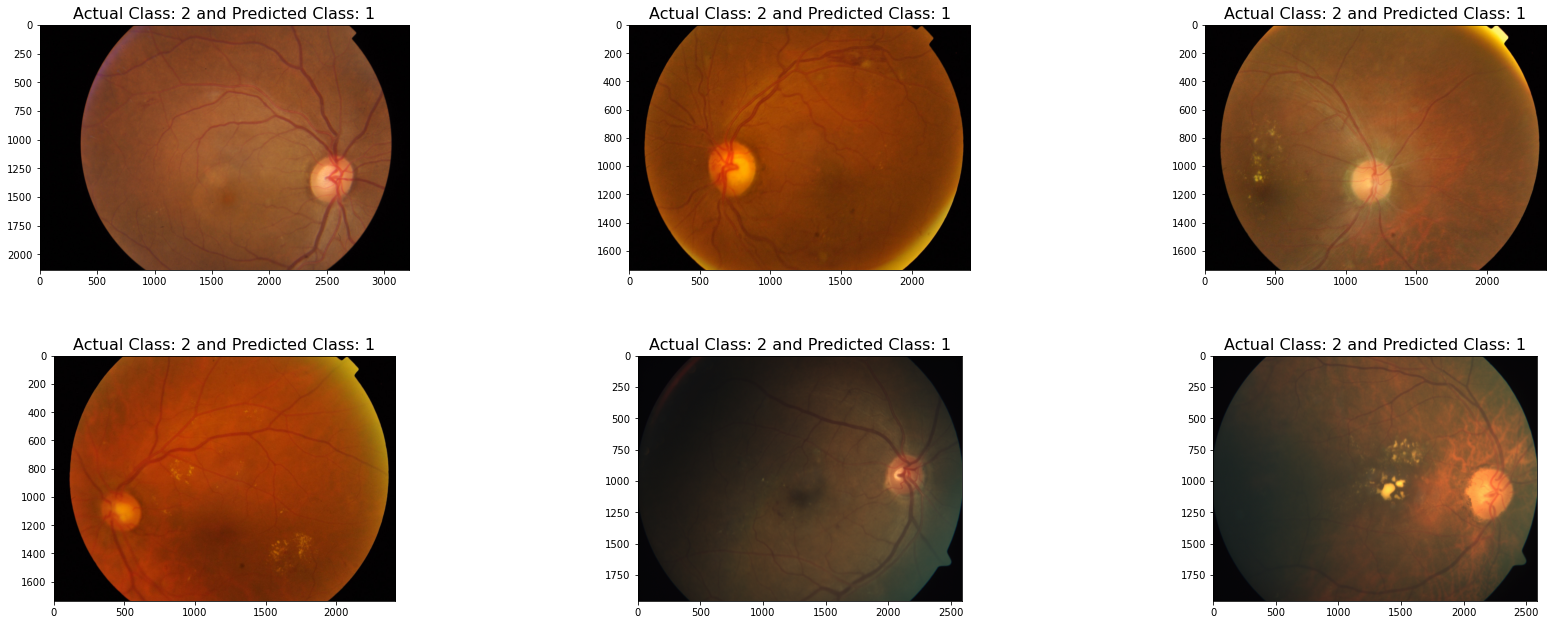

In [68]:
ex = df.loc[(df['predicted'] == 1) & (df['actual'] == 2)][:6]

plt.figure(figsize=(30, 10))
i = 0
for index, row in ex.iterrows():
    
    if (i < 6):
        plt.subplot(2, 3, i + 1)
        path = "train_images/" + row['id_code'] + ".png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.title("Actual Class: " + str(row['actual']) + " and " + \
                  "Predicted Class: " + str(row['predicted']), fontsize=16)
        plt.imshow(image)

        plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=0.35)

        i = i + 1

### <font color='Green'> Analyse des images qui sont prédites comme étant de classe 2 mais qui appartiennent à la classe 1 </font>

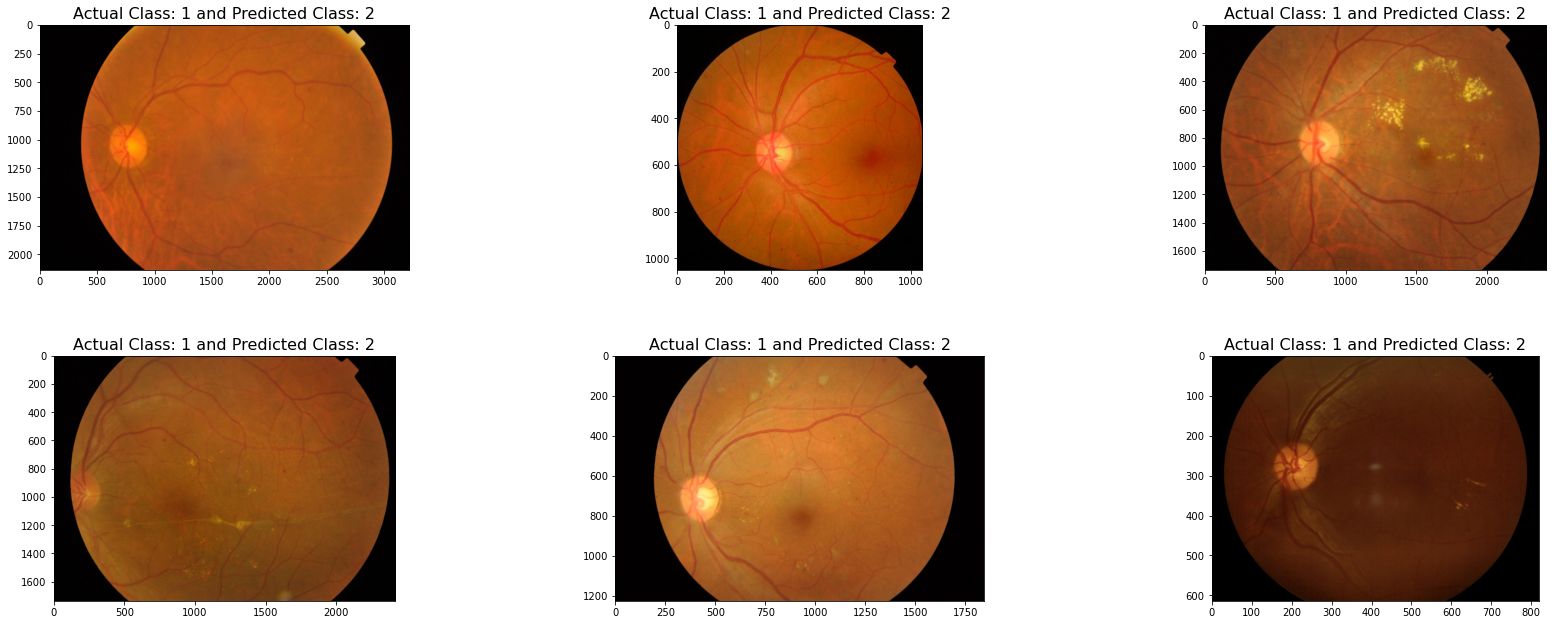

In [69]:
ex = df.loc[(df['predicted'] == 2) & (df['actual'] == 1)][:6]

plt.figure(figsize=(30, 10))
i = 0
for index, row in ex.iterrows():
    
    if (i < 6):
        plt.subplot(2, 3, i + 1)
        path = "train_images/" + row['id_code'] + ".png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.title("Actual Class: " + str(row['actual']) + " and " + \
                  "Predicted Class: " + str(row['predicted']), fontsize=16)
        plt.imshow(image)

        plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=0.35)

        i = i + 1

Ces images sont classées dans la classe 2, qui est légère, alors que la classe réelle à laquelle elles appartiennent est la classe 1, qui est sans RD. Ce n'est pas un problème car des tests supplémentaires ne feront que confirmer que le patient n'a pas de RD.

### <font color='Green'> Analyse des images qui sont prédites comme étant de classe 2 mais qui appartiennent à la classe 3.</font>

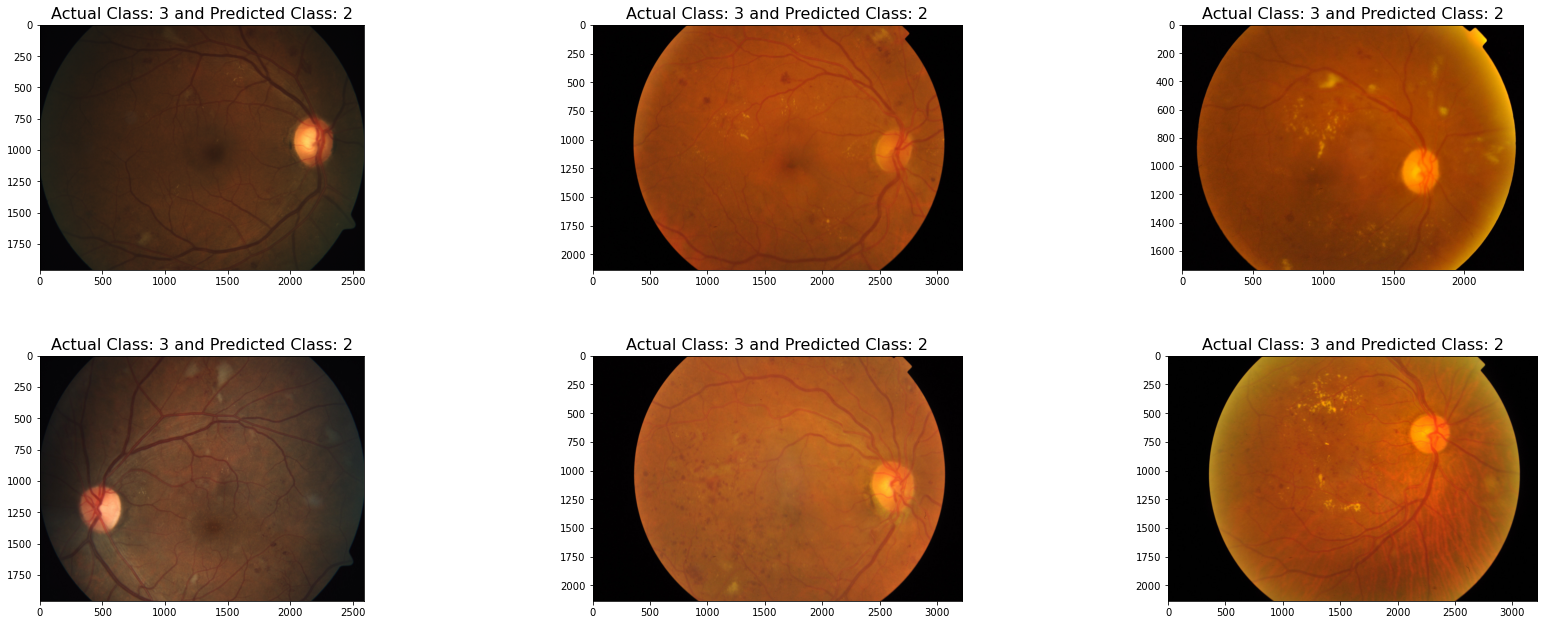

In [70]:
ex = df.loc[(df['predicted'] == 2) & (df['actual'] == 3)][:6]

plt.figure(figsize=(30, 10))
i = 0
for index, row in ex.iterrows():
    
    if (i < 6):
        plt.subplot(2, 3, i + 1)
        path = "train_images/" + row['id_code'] + ".png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.title("Actual Class: " + str(row['actual']) + " and " + \
                  "Predicted Class: " + str(row['predicted']), fontsize=16)
        plt.imshow(image)

        plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=0.35)

        i = i + 1

### <font color='Green'> Analyse des images qui sont prédites comme étant de classe 2 mais qui appartiennent à la classe 4.</font>

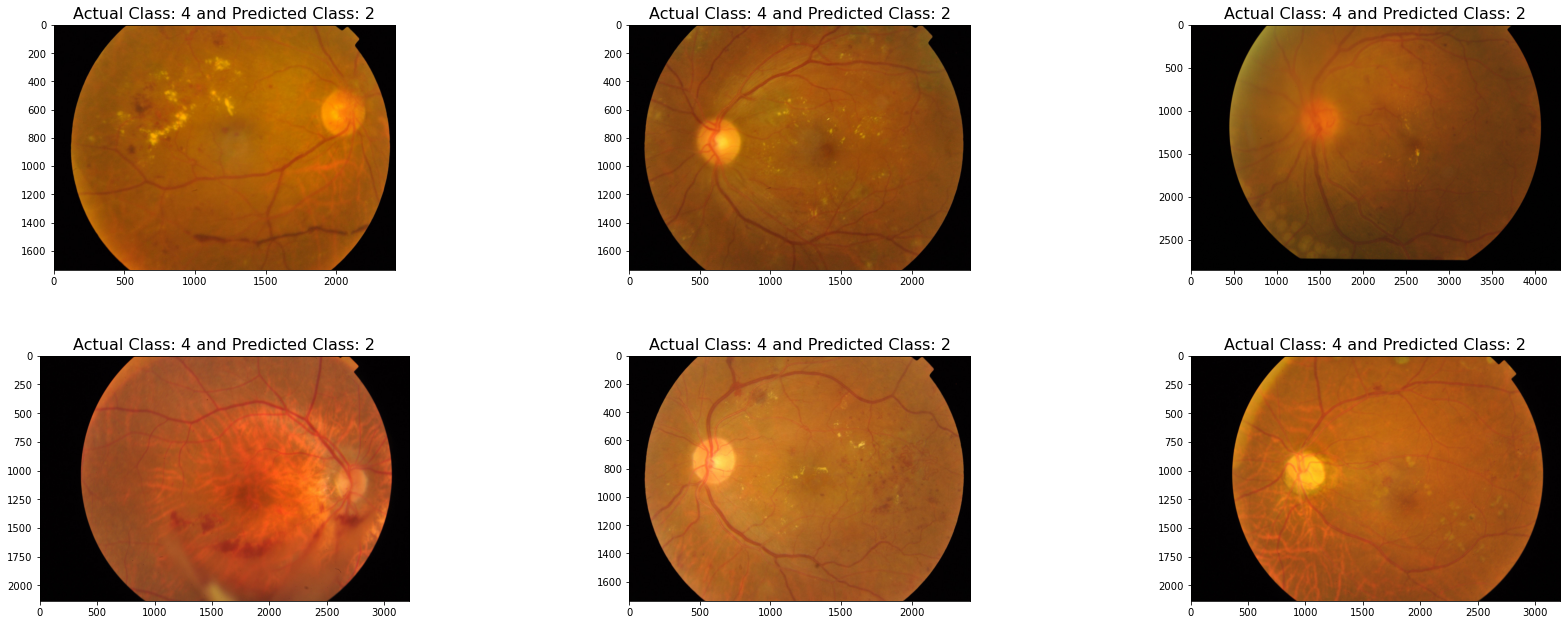

In [71]:
ex = df.loc[(df['predicted'] == 2) & (df['actual'] == 4)][:6]

plt.figure(figsize=(30, 10))
i = 0
for index, row in ex.iterrows():
    
    if (i < 6):
        plt.subplot(2, 3, i + 1)
        path = "train_images/" + row['id_code'] + ".png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.title("Actual Class: " + str(row['actual']) + " and " + \
                  "Predicted Class: " + str(row['predicted']), fontsize=16)
        plt.imshow(image)

        plt.subplots_adjust(left=0.125,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.1, 
                            hspace=0.35)

        i = i + 1

- Ces images sont classées dans la classe 2, qui est légère, alors que la classe réelle à laquelle elles appartiennent est la classe 4, la RD proliférative, qui est le cas le plus grave. C'est un problème pour nous car ces cas peuvent passer inaperçus et le patient peut en souffrir.
- Les cas où l'étiquette prédite est le cas grave de la RD sont préoccupants. Nous devons améliorer notre modèle pour détecter correctement ces cas, sinon cela pourrait être fatal.

### <font color='Green'> Visualiser les images avec les étiquettes et le score du modèle pour chaque étiquette </font>

Actual Label - Proliferative DR
Predicted Label - Moderate


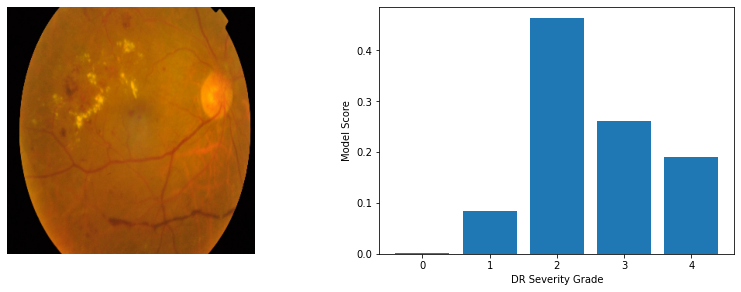

In [72]:
CLASS_NAMES = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

for image, label in val_ds.take(1):

    i = 2

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(image[i])
    plt.axis("off")

    actual_label = "Actual Label - " + CLASS_NAMES[np.argmax(label[i].numpy())]
    print(actual_label)

    prediction = model.predict(val_ds.take(1))[i]    
    number = str(round(100 * prediction[np.argmax(prediction)], 2))
    predicted_label = "Predicted Label - " + CLASS_NAMES[np.argmax(prediction)]
    print(predicted_label)


    plt.subplot(2, 2, 2)
    plt.bar(np.arange(len(prediction)), prediction)
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()

Actual Label - No DR
Predicted Label - No DR


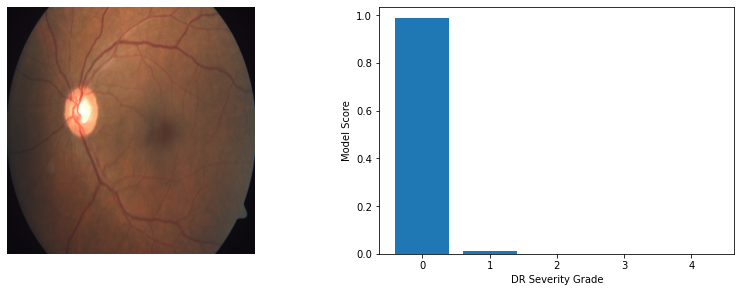

In [73]:
CLASS_NAMES = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

for image, label in val_ds.take(1):

    i = 5

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(image[i])
    plt.axis("off")

    actual_label = "Actual Label - " + CLASS_NAMES[np.argmax(label[i].numpy())]
    print(actual_label)

    prediction = model.predict(val_ds.take(1))[i]    
    number = str(round(100 * prediction[np.argmax(prediction)], 2))
    predicted_label = "Predicted Label - " + CLASS_NAMES[np.argmax(prediction)]
    print(predicted_label)


    plt.subplot(2, 2, 2)
    plt.bar(np.arange(len(prediction)), prediction)
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()

Actual Label - Severe
Predicted Label - Severe


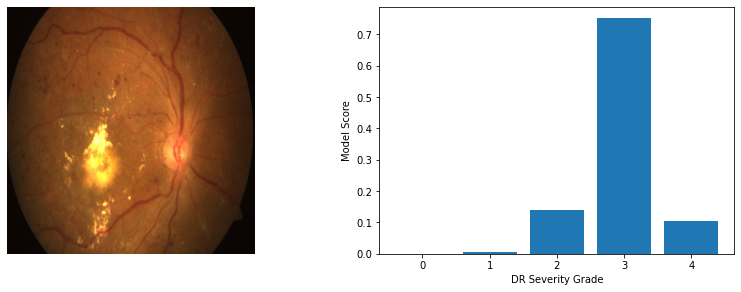

In [74]:
CLASS_NAMES = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

for image, label in val_ds.take(1):

    i = 7

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(image[i])
    plt.axis("off")

    actual_label = "Actual Label - " + CLASS_NAMES[np.argmax(label[i].numpy())]
    print(actual_label)

    prediction = model.predict(val_ds.take(1))[i]    
    number = str(round(100 * prediction[np.argmax(prediction)], 2))
    predicted_label = "Predicted Label - " + CLASS_NAMES[np.argmax(prediction)]
    print(predicted_label)


    plt.subplot(2, 2, 2)
    plt.bar(np.arange(len(prediction)), prediction)
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()

## <font color='Green'> Interpretation </font>

- Notre modèle prédit correctement les patients sans RD alors que d'autres types de conditions posent problème.
- Un nombre réduit d'images avec des données fortement déséquilibrées devrait être la cause de ces problèmes de performance.
- Le recadrage des images peut s'avérer bénéfique
- Notre modèle n'a pas réussi à apprendre les petits détails dans les images pour détecter la RD sévère comme les hémorragies.

## <font color='Green'> Fonction finale pour l'inférence
 </font>


In [75]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
LABELS = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
BATCH_SIZE = 8
IMAGE_SIZE = [320, 320]

def final_func_1(image_path):

    def decode_img(image):
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        return tf.image.resize(image, IMAGE_SIZE)

    def preprocess(image):
        image = tf.io.read_file(image)
        image = decode_img(image)
        return image
    
    image = list(tf.data.Dataset.list_files(image_path))

    ds = tf.data.Dataset.from_tensor_slices(image)
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)

    model = tf.keras.models.load_model("model.h5")

    prediction = model.predict(ds)
    
    number = str(round(100 * prediction[0][np.argmax(prediction[0])], 2))
    predicted_label = f"This image is {number}% {LABELS[np.argmax(prediction)]}"
    
    print(predicted_label)
    
    plt.subplot(1, 1, 1)
    plt.bar(np.arange(len(prediction[0])), prediction[0])
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()

#### Résultats de l'inférence


This image is 46.21% Moderate


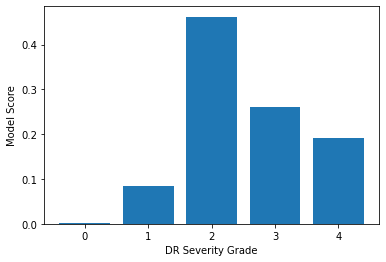

In [76]:
final_func_1("train_images/61bbc11fe503.png")

This image is 99.9% No DR


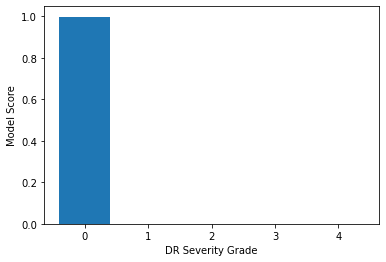

In [77]:
final_func_1("train_images/60edda7b4871.png")

This image is 78.62% Moderate


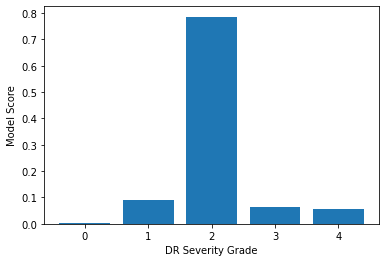

In [78]:
final_func_1("train_images/a3b2e93d058b.png")

This image is 46.21% Moderate
Prediction time: 49.607 seconds
Prediction rate: 0.827 per minute


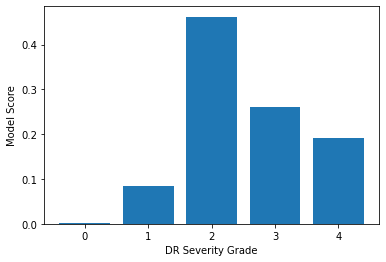

In [80]:
import time
start = time.time()

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.experimental.AUTOTUNE
LABELS = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
BATCH_SIZE = 8
IMAGE_SIZE = [320, 320]

model = tf.keras.models.load_model("model.h5")

def final_func_1(image_path):

    def decode_img(image):
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        return tf.image.resize(image, IMAGE_SIZE)

    def preprocess(image):
        image = tf.io.read_file(image)
        image = decode_img(image)
        return image
    
    image = list(tf.data.Dataset.list_files(image_path))

    ds = tf.data.Dataset.from_tensor_slices(image)
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)

    prediction = model.predict(ds)
    
    number = str(round(100 * prediction[0][np.argmax(prediction[0])], 2))
    predicted_label = f"This image is {number}% {LABELS[np.argmax(prediction)]}"
    
    print(predicted_label)
    
    plt.subplot(1, 1, 1)
    plt.bar(np.arange(len(prediction[0])), prediction[0])
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()
    
final_func_1("train_images/61bbc11fe503.png")

print('Prediction time: {:.3f} seconds'.format(time.time() - start))
print('Prediction rate: {:.3f} per minute'.format((time.time() - start)/60))

This image is 78.62% Moderate
Prediction rate - 0.010 per minute


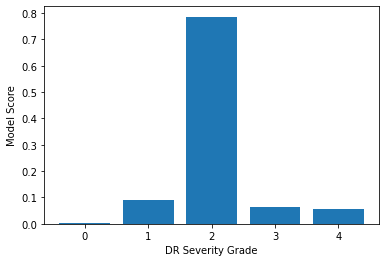

In [81]:
start = time.time()

final_func_1("train_images/a3b2e93d058b.png")

print('Prediction rate - {:.3f} per minute'.format((time.time() - start)/60))

This image is 99.9% No DR
Prediction rate - 0.007 per minute
Prediction rate - 0.447 per seconde


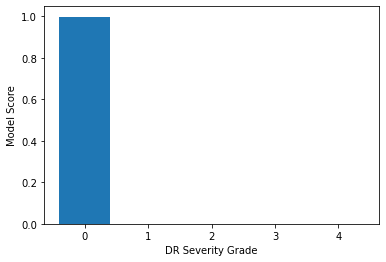

In [85]:
start = time.time()

final_func_1("train_images/60edda7b4871.png")

print('Prediction rate - {:.3f} per minute'.format((time.time() - start)/60))
print('Prediction rate - {:.3f} per seconde'.format((time.time() - start)))

#### Conclusion

Pour la première fois, le temps de prédiction (46s) est plus faible après le chargement du modèle en plusieurs fois et ensuite nous prédisons.